In [1]:
import pandas as pd
import numpy as np

In [2]:
def check_ifreal(y: pd.Series) -> bool:
    """
    Function to check if the given series has real or discrete values
    """
    # print(y.dtype)
    if(y.dtype=='float64'):
        return True
    else:
        return False

In [3]:
def mean_square_col(Y:pd.Series):
    if(len(Y)==0):
        return 0
    ans=0
    mean=Y.mean()
    return (Y.apply(lambda x:(x-mean)**2).sum())/len(Y)

def mse(Y:pd.Series,attr:pd.Series) -> float:
    result=0
    total_val=len(attr)
    for attribute,val in attr.value_counts().items():
        result+=(val/total_val)*(mean_square_col(Y[attr==attribute]))
        
    return result


def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """
    return Y.value_counts(normalize=True).apply(lambda x: -x*np.log2(x+1e-6)).sum()

def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    """
    return 1-Y.value_counts(normalize=True).apply(lambda x: x**2).sum()

In [4]:
def information_gain(Y: pd.Series, attr: pd.Series,check_rin=False) -> float:
    """
    Function to calculate the information gain
    """        
    # print(mean_square_col(Y)-mse(Y,attr))
    # if(check_ifreal(Y)):
        
    #     return mean_square_col(Y)-mse(Y,attr)
    if(check_rin):
        attr = pd.Series(attr, name='Column1')
        Y_new = pd.Series(Y, name='Column2')
        df = pd.DataFrame({'Column1': attr, 'Column2': Y_new})
        df2 = df.sort_values(by='Column1').reset_index(drop=True)
        entropy_y=entropy(Y)

        max_info =0
        chosen_split = 1e6
        for i in range(len(df2) - 1):
            ind1 = i
            ind2 = i + 1
            avg_val = (df2['Column1'].iloc[ind1] + df2['Column1'].iloc[ind2]) / 2
            Y1 = Y[:ind2]
            Y2 = Y[ind2:]
            en1 = entropy(Y1)
            en2 = entropy(Y2)
            net_en = entropy_y - ((len(Y1) / (len(Y1) + len(Y2))) * en1) - ((len(Y2) / (len(Y1) + len(Y2))) * en2)
            if net_en > max_info:
                max_info = net_en
                chosen_split = avg_val
            if(pd.isna(chosen_split)):
                print(attr)
        return max_info, chosen_split
    
    else:
        entropy_y=entropy(Y)
        info_gain=entropy_y
        total_vals=len(attr)
        for attribute,val in attr.value_counts().items():
            info_gain-=val/total_vals*(entropy(Y[attr == attribute]))
        return info_gain 
        

def info_for_real(Y: pd.Series, attr: pd.Series):
    attr = pd.Series(attr, name='Column1')
    Y_new = pd.Series(Y, name='Column2')
    df = pd.DataFrame({'Column1': attr, 'Column2': Y_new})
    df2 = df.sort_values(by='Column1').reset_index(drop=True)

    min_mse = 1e6
    min_mse_val = 0
    for i in range(len(df2) - 1):
        ind1 = i
        ind2 = i + 1
        avg_val = (df2['Column1'].iloc[ind1] + df2['Column1'].iloc[ind2]) / 2
        Y1 = Y[:ind2]
        Y2 = Y[ind2:]
        mse1 = mean_square_col(Y1)
        mse2 = mean_square_col(Y2)
        net_mse = (len(Y1) / (len(Y1) + len(Y2))) * mse1 + (len(Y2) / (len(Y1) + len(Y2))) * mse2
        if net_mse < min_mse:
            min_mse = net_mse
            min_mse_val = avg_val
    return min_mse, min_mse_val

def gini_gain(Y: pd.Series, attr: pd.Series,check_rin=False) -> float:
    """
    Function to calculate the information gain
    """        
    # print(mean_square_col(Y)-mse(Y,attr))
    # if(check_ifreal(Y)):
        
    #     return mean_square_col(Y)-mse(Y,attr)
    if(check_rin):
        attr = pd.Series(attr, name='Column1')
        Y_new = pd.Series(Y, name='Column2')
        df = pd.DataFrame({'Column1': attr, 'Column2': Y_new})
        df2 = df.sort_values(by='Column1').reset_index(drop=True)
        entropy_y=gini_index(Y)

        max_info =0
        chosen_split = 1e6
        for i in range(len(df2) - 1):
            ind1 = i
            ind2 = i + 1
            avg_val = (df2['Column1'].iloc[ind1] + df2['Column1'].iloc[ind2]) / 2
            Y1 = Y[:ind2]
            Y2 = Y[ind2:]
            en1 = gini_index(Y1)
            en2 = gini_index(Y2)
            net_en = entropy_y - ((len(Y1) / (len(Y1) + len(Y2))) * en1) - ((len(Y2) / (len(Y1) + len(Y2))) * en2)
            if net_en > max_info:
                max_info = net_en
                chosen_split = avg_val
        return max_info, chosen_split
    
    else:
        entropy_y=gini_index(Y)
        info_gain=entropy_y
        total_vals=len(attr)
        for attribute,val in attr.value_counts().items():
            info_gain-=val/total_vals*(gini_index(Y[attr == attribute]))
        return info_gain 

In [5]:
def opt_split_attribute(X: pd.DataFrame, y: pd.Series, criterion, features: pd.Series,check_rin=False):
    """
    Function to find the optimal attribute to split about.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.
    features: pd.Series is a list of all the attributes we have to split upon
    return: attribute to split upon
    """
    if(check_ifreal(y)):
        if(check_rin):
            if(criterion=="information_gain"):
                min_error=1e6
                chosen_attribute=""
                chosen_split=1e6
                for attribute in features:
                    if(info_for_real(y,X[attribute])[0]<min_error):
                        min_error=info_for_real(y,X[attribute])[0]
                        chosen_split=info_for_real(y,X[attribute])[1]
                        chosen_attribute=attribute
                return chosen_attribute,chosen_split
        
        
            else:
                min_error=1e6
                chosen_attribute=""
                chosen_split=1e6
                for attribute in features:
                    if(info_for_real(y,X[attribute])[0]<min_error):
                        min_error=info_for_real(y,X[attribute])[0]
                        chosen_split=info_for_real(y,X[attribute])[1]
                        chosen_attribute=attribute
                return chosen_attribute,chosen_split

        else:
            if(criterion=="information_gain"):
                
                # print(features)
                max_gain=0
                chosen_attribute=""
                for attribute in features:
                    if(information_gain(y,X[attribute])>max_gain):
                        max_gain=information_gain(y,X[attribute])
                        chosen_attribute=attribute
                return chosen_attribute

            else:
                max_gain=0
                chosen_attribute=""
                for attribute in features:
                    if(information_gain(y,X[attribute])>max_gain):
                        max_gain=information_gain(y,X[attribute])
                        chosen_attribute=attribute
                return chosen_attribute

 
    else:
        if(check_rin):
            if(criterion=="information_gain"):
                max_gain=0
                chosen_attribute=""
                chosen_split=1e6
                for attribute in features:
                    print(attribute)
                    print(information_gain(y,X[attribute],check_rin=True)[0])
                    print(information_gain(y,X[attribute],check_rin=True)[1])
                    if(information_gain(y,X[attribute],check_rin=True)[0]>max_gain):
                        max_gain=information_gain(y,X[attribute],check_rin=True)[0]
                        chosen_split=information_gain(y,X[attribute],check_rin=True)[1]
                        chosen_attribute=attribute
                return (chosen_attribute,chosen_split)
        
        
            else:
                max_gain=0
                chosen_attribute=""
                chosen_split=1e6
                for attribute in features:
                    if(gini_gain(y,X[attribute],check_rin=True)[0]>max_gain):
                        max_gain=gini_gain(y,X[attribute],check_rin=True)[0]
                        chosen_split=gini_gain(y,X[attribute],check_rin=True)[1]
                        chosen_attribute=attribute
                return chosen_attribute,chosen_split

              
        else:
            if(criterion=="information_gain"):
                
                # print(features)
                max_gain=0
                chosen_attribute=""
                for attribute in features:
                    if(information_gain(y,X[attribute])>max_gain):
                        max_gain=information_gain(y,X[attribute])
                        chosen_attribute=attribute
                return chosen_attribute

            else:
                max_gain=0
                chosen_attribute=""
                for attribute in features:
                    if(gini_gain(y,X[attribute])>max_gain):
                        max_gain=gini_gain(y,X[attribute])
                        chosen_attribute=attribute
                return chosen_attribute

In [6]:
def split_data(X: pd.DataFrame, y: pd.Series, attribute, value):
    """
    Funtion to split the data according to an attribute.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    attribute: attribute/feature to split upon
    value: value of that attribute to split upon

    return: splitted data(Input and output)
    """

    # Split the data based on a particular value of a particular attribute. You may use masking as a tool to split the data.
    X_match, y_match = X[X[attribute] == value], y[X[attribute] == value]
    return (X_match,y_match)

In [7]:
from typing import Union

def accuracy(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the accuracy
    """

    """
    The following assert checks if sizes of y_hat and y are equal.
    Students are required to add appropriate assert checks at places to
    ensure that the function does not fail in corner cases.
    """
    assert y_hat.size == y.size
    # TODO: Write here
    return (y_hat==y).sum()/y.size
    pass


def precision(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the precision
    """
    true_positive = ((y_hat == cls) & (y == cls)).sum()
    false_positive = ((y_hat == cls) & (y != cls)).sum()
    if true_positive + false_positive == 0:
        return 0.0
    precision_value = true_positive / (true_positive + false_positive)
    return precision_value

    pass


def recall(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the recall
    """
    true_positive = ((y_hat == cls) & (y == cls)).sum()
    false_negative = ((y_hat != cls) & (y == cls)).sum()
    if true_positive + false_negative == 0:
        return 0.0 
    recall_value = true_positive / (true_positive + false_negative)
    return recall_value
    pass


def rmse(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the root-mean-squared-error(rmse)
    """
    mse_val = ((y_hat - y) ** 2).mean()
    rmse_val = np.sqrt(mse_val)
    return rmse_val
    pass


def mae(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the mean-absolute-error(mae)
    """
    mae_val = (np.abs(y_hat - y)).mean()
    return mae_val
    pass

In [8]:
from dataclasses import dataclass
from typing import Literal
import matplotlib.pyplot as plt
from collections import Counter
np.random.seed(42)


@dataclass
class DecisionTree:
    criterion: Literal["information_gain", "gini_index"]  # criterion won't be used for regression
    max_depth: int  # The maximum depth the tree can grow to

    def __init__(self, criterion, max_depth=5):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree=None
      
    def DIDO(self,X: pd.DataFrame, y: pd.Series,depth=3):
        
        attribute_names=list(X.columns)
        cnt = Counter(x for x in y)
        if len(cnt) == 1:
            return next(iter(cnt))  # next input data set, or raises StopIteration when EOF is hit.
        ## Second check: Is this split of the dataset empty? if yes, return a default value
        elif len(X)==0 or (not attribute_names):
            return None
        elif(depth==0):
            # print(cnt.most_common(1)[0],"Hello")
            return cnt.most_common(1)[0][0]

        else:               
          best_attr = opt_split_attribute(X,y,criterion=self.criterion,features=attribute_names)    
          # X.drop(best_attr, axis=1, inplace=True)
          tree = {best_attr:{}} # Initiate the tree with best attribute as a node
          if(len(X)==0):
            return None
          for attr_val, data_subset in X.groupby(by=best_attr,as_index=False):
            data_subset=data_subset.drop(best_attr,axis=1)
            # print(attr_val,data_subset)
            y_new=y[X[best_attr]==attr_val]
            subtree=self.DIDO(data_subset,y_new,depth-1)
            tree[best_attr][attr_val]=subtree
          self.tree=tree
          return tree
        
    def DIRO(self,X: pd.DataFrame, y: pd.Series,depth):
        attribute_names=list(X.columns)
        cnt = Counter(x for x in y)
        if len(cnt) == 1:
            return y.mean()  # next input data set, or raises StopIteration when EOF is hit.
        ## Second check: Is this split of the dataset empty? if yes, return a default value
        elif len(X)==0 or (not attribute_names):
            return None
        elif depth==0:
          return y.mean()

        else:               
          best_attr = opt_split_attribute(X,y,criterion=self.criterion,features=attribute_names)    
          # X.drop(best_attr, axis=1, inplace=True)
          tree = {best_attr:{}} # Initiate the tree with best attribute as a node
          if(len(X)==0):
            return None
          for attr_val, data_subset in X.groupby(by=best_attr,as_index=False):
            data_subset=data_subset.drop(best_attr,axis=1)
            y_new=y[X[best_attr]==attr_val]
            subtree=self.DIRO(data_subset,y_new,depth-1)
            tree[best_attr][attr_val]=subtree
          self.tree=tree
          return tree
  
    def RIRO(self,X:pd.DataFrame,y:pd.Series,depth):
      attribute_names=list(X.columns)
      cnt = Counter(x for x in y)
      # print(X)
      if len(cnt) == 1:
          return y.mean()
          ## Second check: Is this split of the dataset empty? if yes, return a default value
      elif len(X)==0 or (not attribute_names):
              return {}
      elif depth==0:
          return y.mean()
      attribute,split_value=opt_split_attribute(X,y,criterion=self.criterion,features=pd.Series(list(X.columns)),check_rin=True)

      #X['out']=y.copy()
      # print(X)
      X_new=X
      X_new.loc[:, 'out'] = y.copy()
      X_new=X_new.sort_values(by=attribute,ascending=True)
      X_new=X_new.reset_index()
      X_new=X_new.drop(['index'],axis=1)
      # y_new=X['out']
      # X.drop(['out'],axis=1)
      # print(attribute)
      tree={attribute:{}}
      
      data_subset_less=pd.DataFrame(X_new[X_new[attribute]<=split_value])
      y_less=pd.Series(data_subset_less['out'])
      df2=data_subset_less.drop(['out'],axis=1)
      # print(df2)
      # df3=df2.drop(attribute,axis=1)
      # print(df3)
      # return 
      split1="Less than " + str(split_value)
      subtree_less=self.RIRO(df2,y_less,depth-1)
      
      tree[attribute][split1] =subtree_less 
      
      data_subset_more=X_new[X_new[attribute]>split_value]
      y_more=pd.Series(data_subset_more['out'])
      df4=data_subset_more.drop(['out'],axis=1)
      # df5=df4.drop(attribute,axis=1)
      split2="Greater than " + str(split_value)
      subtree_more=self.RIRO(df4,y_more,depth-1)
      tree[attribute][split2]=subtree_more
      
      self.tree=tree
      return tree
    
    def RIDO(self,X:pd.DataFrame,y:pd.Series,depth=2):
      attribute_names=list(X.columns)
      cnt = Counter(x for x in y)
      # print(X)
      if len(cnt) == 1:
          return next(iter(cnt))
          ## Second check: Is this split of the dataset empty? if yes, return a default value
      elif len(X)==0 or (not attribute_names):
              return None
      elif(depth==0):
            # print(cnt.most_common(1)[0],"Hello")
            return cnt.most_common(1)[0][0]
    #   print(list(X.columns))
      attribute,split_value=opt_split_attribute(X,y,criterion=self.criterion,features=pd.Series(list(X.columns)),check_rin=True)
      
      X_new=X
      X_new.loc[:, 'out'] = y.copy()
      X_new=X_new.sort_values(by=attribute,ascending=True)
      X_new=X_new.reset_index()
      X_new=X_new.drop(['index'],axis=1)
      tree={attribute:{}}
      
      data_subset_less=pd.DataFrame(X_new[X_new[attribute]<=split_value])
      y_less=pd.Series(data_subset_less['out'])
      df2=data_subset_less.drop(['out'],axis=1)
      # print(df2)
      # df3=df2.drop(attribute,axis=1)
      # print(df3)
      # return 
      split1="Less than " + str(split_value)
      subtree_less=self.RIDO(df2,y_less,depth-1)
      
      tree[attribute][split1] =subtree_less 
      
      data_subset_more=X_new[X_new[attribute]>split_value]
      y_more=pd.Series(data_subset_more['out'])
      df4=data_subset_more.drop(['out'],axis=1)
      # df5=df4.drop(attribute,axis=1)
      split2="Greater than " + str(split_value)
      subtree_more=self.RIDO(df4,y_more,depth-1)
      tree[attribute][split2]=subtree_more
      
      self.tree=tree
      return tree
  
    def fit(self, X: pd.DataFrame, y: pd.Series):
        if(check_ifreal(y)):
            if(check_ifreal(X.iloc[:, 0])):
              return self.RIRO(X,y,self.max_depth)
            else:
              return self.DIRO(X,y,self.max_depth)
        else:
            if(check_ifreal(X.iloc[:, 0])):
              return self.RIDO(X,y,self.max_depth)
            else:
              return self.DIDO(X,y,self.max_depth)
            
    def predict_help_RIRO(self,row, tree):
      if tree is not None and isinstance(tree, dict):
          if not tree:  
              return 0  

          key = next(iter(tree))  
          if (isinstance(key, int) or isinstance(key, str)):
              # If the key is an integer, it's directly an attribute index
              attribute = key
              condition = list(tree[key].keys())[0]  
          else:
              # If the key is a string, split it to get attribute and condition
              print(key.split(' ', 1))
              attribute, condition = key.split(' ', 1)
              attribute = int(attribute)

          if 'Less than' in condition:
              threshold = float(condition.split(' ')[2])
              if row[attribute] < threshold:
                  result = tree[key]['Less than ' + str(threshold)]
              else:
                  result = tree[key].get('Greater than ' + str(threshold), 0)
          elif 'Greater than' in condition:
              threshold = float(condition.split(' ')[2])
              if row[attribute] > threshold:
                  result = tree[key]['Greater than ' + str(threshold)]
              else:
                  result = tree[key].get('Less than ' + str(threshold), 0)
          else:
              raise ValueError("Invalid condition in tree")

          if isinstance(result, dict):
              return self.predict_help_RIRO(row, result)
          else:
              return result
      else:
          return 0

    def predict_RIRO(self,X, tree):
        """
        Function to run the decision tree on test inputs.
        """
        
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self.predict_help_RIRO(row, tree))
        return pd.Series(predictions)
           
    def predict_help(self,row,tree):
        if(tree!=None):
          attribute=next(iter(tree))
          if row[attribute] in tree[attribute].keys():
              result=tree[attribute][row[attribute]]
              if isinstance(result,dict):
                  return self.predict_help(row,result)
              else:
                  return result
        else:
           return 0
    
    def predict_DIDO(self, X: pd.DataFrame) -> pd.Series:
      """
      Funtion to run the decision tree on test inputs
      """
      list=[]
      output=""
      
      for row in X.iloc:
          tree=self.tree
          list.append(self.predict_help(row,tree))
      return pd.Series(list)
         
    def predict(self, X: pd.DataFrame) -> pd.Series:
        """
        Funtion to run the decision tree on test inputs
        """
        # list=[]
        # output=""
        
        # for row in X.iloc:
        #     tree=self.tree
        #     list.append(self.predict_help(row,tree))
        # return pd.Series(list)
            
        # Traverse the tree you constructed to return the predicted values for the given test inputs.
        
        # if(check_ifreal(y)):
        if(check_ifreal(X.iloc[:, 0])):
              return self.predict_RIRO(X,self.tree)
        else:
              return self.predict_DIDO(X)
        # # else:
        #     if(check_ifreal(X[0])):
        #       return self.predict_RIDO(X,y)
        #     else:
        #       return self.predict_DIDO(X,y)

    def plot(self) -> None:
        """
        Function to plot the tree

        Output Example:
        ?(X1 > 4)
            Y: ?(X2 > 7)
                Y: Class A
                N: Class B
            N: Class C
        Where Y => Yes and N => No
        """
        pass

In [9]:
def traverse_tree(tree, indent=0):
    indent_str = " " * indent
    if(tree!=None):
        if len(tree) == 1 and 0 in tree:
            attribute=next(iter(tree))
            for k in tree[attribute].keys():
                result=tree[attribute][k]
                if isinstance(result,dict):
                    question = list(result.keys())[0]
                    answer = list(result.values())[0]
                    print(f"{indent_str}?({question})")
                    print(list(answer.keys())[0])
                    #print(f"{indent_str}?({question})")
                    traverse_tree(result, indent + 4)
                    return traverse_tree(result)
                else:
                    return result
            else:
                key = list(tree.keys())[0]
                value = tree[key]
                print(f"{indent_str}{key.upper()}:")
                traverse_tree(value, indent + 4)
                
    else:
        return 0


def dict_depth(dic):
    # Initialize a stack with the first key-value pair in the dictionary
    stack = [(dic, 1)]
    # Initialize the maximum depth
    max_depth = 1
    # Iterate over the stack
    while stack:
        # Pop the key-value pair from the top of the stack
        curr_dict, depth = stack.pop()
        # If the value is a dictionary, add its key-value pairs to the stack
        for key, value in curr_dict.items():
            if isinstance(value, dict):
                stack.append((value, depth + 1))
        # Update the maximum depth
        max_depth = max(max_depth, depth)
    # Return the maximum depth
    return max_depth

In [10]:
np.random.seed(42)
# Test case 1
# Real Input and Real Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))


for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)

    print(tree.tree)
    
    # print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

{0: {'Less than 1.870195015413759': {0: {'Less than -1.3181071960107182': {0: {'Less than -1.5070891895991256': {0: {'Less than -1.7347173231825872': -0.0771017094141042, 'Greater than -1.7347173231825872': 0.01300189187790702}}, 'Greater than -1.5070891895991256': {0: {'Less than -1.4394428450912664': -0.7537361643574896, 'Greater than -1.4394428450912664': -0.8895144296255233}}}}, 'Greater than -1.3181071960107182': {0: {'Less than -0.4712959653288761': {0: {'Less than -0.6607754103120528': {0: {'Less than -0.9703439291828655': 0.4738329209117875, 'Greater than -0.9703439291828655': 0.6565536086338297}}, 'Greater than -0.6607754103120528': {0: {'Less than -0.5819970707351848': 1.8657745111447566, 'Greater than -0.5819970707351848': 1.0958807529407848}}}}, 'Greater than -0.4712959653288761': {0: {'Less than 0.7601447258863604': {0: {'Less than 0.6175903665033216': -0.08830761092183063, 'Greater than 0.6175903665033216': -1.1913034972026486}}, 'Greater than 0.7601447258863604': {0: {'L

In [11]:
np.random.seed(42)
# Test case 2
# Real Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria,max_depth=12)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    # tree.plot()
    print(tree.tree)
    # print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

0
0.16119892416367532
-0.4712959653288761
1
0.16119892416367532
-0.4028638015908378
2
0.16119892416367532
-0.3323880163662225
3
0.16119892416367532
-0.5240152110203431
4
0.16119892416367532
-0.5947512395651535
0
0.5567783510278328
-1.4394428450912664
1
0.5567783510278328
-0.3031521497145881
2
0.5567783510278328
-0.7025091151264372
3
0.5567783510278328
-0.9828675022385556
4
0.5567783510278328
-0.577005683804475
0
0.8631176831889152
-0.5320222864127546
1
0.8631176831889152
0.5621328563534148
2
0.8631176831889152
0.3214992211274792
3
0.8631176831889152
-0.6660187364943289
4
0.8631176831889152
0.6628966277537771
0
0.3219272292732592
-0.6607754103120528
1
0.3219272292732592
-0.10589086388030182
2
0.3219272292732592
0.15037505392866998
3
0.3219272292732592
-0.8551506723714148
4
0.3219272292732592
0.017787762101557192
0
0.9999985573071228
-0.5819970707351848
1
0.9999985573071228
0.419723532087257
2
0.9999985573071228
0.15037505392866998
3
0.9999985573071228
-0.9828675022385556
4
0.99999855730

In [12]:
np.random.seed(42)
# Test case 3
# Discrete Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    print(tree.tree)
    print(dict_depth(tree.tree))
    y_hat = tree.predict(X)
    # tree.plot()
    # print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

{3: {0: {0: {0: 3, 1: 0, 2: 0, 3: {1: {0: None, 1: 2, 2: None, 3: 4, 4: None}}, 4: {1: {0: None, 1: 2, 2: 2, 3: 0, 4: None}}}}, 1: {1: {0: 0, 1: 0, 2: None, 3: 2, 4: 4}}, 2: {0: {0: {1: {0: None, 1: 0, 2: None, 3: None, 4: 3}}, 1: 0, 2: 0, 3: {1: {0: None, 1: 3, 2: 0, 3: 3, 4: None}}, 4: 0}}, 3: {2: {0: 2, 1: None, 2: None, 3: 2, 4: 4}}, 4: {1: {0: 1, 1: None, 2: 3, 3: 1, 4: None}}}}
6
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  1.0
{3: {0: {0: {0: 3, 1: 0, 2: 0, 3: {1: {0: None, 1: 2, 2: None, 3: 4, 4: None}}, 4: {1: {0: None, 1: 2, 2: 2, 3: 0, 4: None}}}}, 1: {1: {0: 0, 1: 0, 2: None, 3: 2, 4: 4}}, 2: {0: {0: {1: {0: None, 1: 0, 2: None, 3: None, 4: 3}}, 1: 0, 2: 0, 3: {1: {0: None, 1: 3, 2: 0, 3: 3, 4: None}}, 4: 0}}, 3: {2: {0: 2, 1: None, 2: None, 3: 2, 4: 4}}, 4: {1: {0: 1, 1: None, 2: 3, 3: 1, 4: None}}}}
6
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Re

In [13]:
np.random.seed(42)
# Test case 4
# Discrete Input and Real Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    print(tree.tree)
    y_hat = tree.predict(X)
    # tree.plot()
    # print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

{0: {0: {1: {0: None, 1: 1.0867270230392738, 2: 0.3380226588751415, 3: None, 4: -1.4264788847255525}}, 1: {1: {0: -0.14647280674161622, 1: {2: {0: -1.9399112186032432, 1: -1.4585169209867577, 2: None, 3: None, 4: None}}, 2: None, 3: -0.4417660232260129, 4: -0.5066432196315238}}, 2: {2: {0: {1: {0: 1.9745711969534863, 1: None, 2: None, 3: 1.9650347639254644, 4: None}}, 1: {1: {0: None, 1: None, 2: -1.3099506872124742, 3: None, 4: 2.943663416481284}}, 2: None, 3: -1.0962657952813555, 4: {1: {0: -0.5137874915082461, 1: None, 2: None, 3: 0.8499212040623495, 4: None}}}}, 3: {2: {0: {1: {0: None, 1: -0.8460170164557059, 2: None, 3: -0.6660606202304288, 4: None}}, 1: 0.724083251525877, 2: 0.1686593871932945, 3: {3: {0: -0.7626269642151516, 1: None, 2: 1.004986880702632, 3: None, 4: None}}, 4: {1: {0: None, 1: -0.6627383133782134, 2: None, 3: 1.2370160729364614, 4: None}}}}, 4: {4: {0: -0.8703049545610739, 1: -0.8224893687800624, 2: -1.3113242257511093, 3: {2: {0: None, 1: None, 2: None, 3: -0

In [14]:
def print_decision_tree(tree, depth=0, branch=None):
    if isinstance(tree, dict):
        keys = list(tree.keys())
        for i, key in enumerate(keys):
            # Print the question or the branch
            if depth == 0 or i > 0:
                branch_label = "N:" if i > 0 else "Y:"
                print(f"{'    ' * depth}{branch_label} ?(X{depth + 1} > {key})")
            else:
                print(f"{'    ' * depth}?(X{depth + 1} > {key})")

            # Recursively print the subtree
            print_decision_tree(tree[key], depth + 1, branch=i == 0)
    else:
        # Print the class for leaf nodes
        class_label = f"Class {tree}" if tree is not None else "Unknown Class"
        print(f"{'    ' * depth}    {class_label}")

# Example usage
tree = {
    3: {0: {0: {0: 3, 1: 0, 2: 0, 3: {1: {0: None, 1: 2, 2: None, 3: 4, 4: None}}, 4: {1: {0: None, 1: 2, 2: 2, 3: 0, 4: None}}}},
    1: {1: {0: 0, 1: 0, 2: None, 3: 2, 4: 4}},
    2: {0: {0: {1: {0: None, 1: 0, 2: None, 3: None, 4: 3}}, 1: 0, 2: 0, 3: {1: {0: None, 1: 3, 2: 0, 3: 3, 4: None}}, 4: 0}},
    3: {2: {0: 2, 1: None, 2: None, 3: 2, 4: 4}},
    4: {1: {0: 1, 1: None, 2: 3, 3: 1, 4: None}}
}
}
print_decision_tree(tree)

Y: ?(X1 > 3)
    ?(X2 > 0)
        ?(X3 > 0)
            ?(X4 > 0)
                    Class 3
            N: ?(X4 > 1)
                    Class 0
            N: ?(X4 > 2)
                    Class 0
            N: ?(X4 > 3)
                ?(X5 > 1)
                    ?(X6 > 0)
                            Unknown Class
                    N: ?(X6 > 1)
                            Class 2
                    N: ?(X6 > 2)
                            Unknown Class
                    N: ?(X6 > 3)
                            Class 4
                    N: ?(X6 > 4)
                            Unknown Class
            N: ?(X4 > 4)
                ?(X5 > 1)
                    ?(X6 > 0)
                            Unknown Class
                    N: ?(X6 > 1)
                            Class 2
                    N: ?(X6 > 2)
                            Class 2
                    N: ?(X6 > 3)
                            Class 0
                    N: ?(X6 > 4)
                         

In [15]:
tree2={0: {'Less than -0.4712959653288761': {0: {'Less than -1.4394428450912664': 3, 'Greater than -1.4394428450912664': {0: {'Less than -0.5320222864127546': {0: {'Less than -0.6607754103120528': 0, 'Greater than -0.6607754103120528': {0: {'Less than -0.5819970707351848': 2, 'Greater than -0.5819970707351848': 0}}}}, 'Greater than -0.5320222864127546': {0: {'Less than -0.4904656407149133': 3, 'Greater than -0.4904656407149133': 1}}}}}}, 'Greater than -0.4712959653288761': {0: {'Less than 0.8765913117457111': {0: {'Less than 0.16919126215699776': {0: {'Less than -0.3487773248808214': 2, 'Greater than -0.3487773248808214': {0: {'Less than -0.22690442239334624': 3, 'Greater than -0.22690442239334624': {0: {'Less than 0.10400006952895324': 0, 'Greater than 0.10400006952895324': 3}}}}}}, 'Greater than 0.16919126215699776': {0: {'Less than 0.31281565586420373': 2, 'Greater than 0.31281565586420373': {0: {'Less than 0.7601447258863604': {0: {'Less than 0.45038250491288556': {0: {'Less than 0.3427397874516045': 4, 'Greater than 0.3427397874516045': {0: {'Less than 0.38272323116147616': 2, 'Greater than 0.38272323116147616': 4}}}}, 'Greater than 0.45038250491288556': {0: {'Less than 0.6175903665033216': 0, 'Greater than 0.6175903665033216': 2}}}}, 'Greater than 0.7601447258863604': {0: {'Less than 0.7864274094101786': 4, 'Greater than 0.7864274094101786': {0: {'Less than 0.8064672257091354': 0, 'Greater than 0.8064672257091354': 4}}}}}}}}}}, 'Greater than 0.8765913117457111': {0: {'Less than 1.4109443987461885': 1, 'Greater than 1.4109443987461885': {0: {'Less than 1.5077915869695468': 3, 'Greater than 1.5077915869695468': {0: {'Less than 1.870195015413759': 2, 'Greater than 1.870195015413759': 0}}}}}}}}}}
print_decision_tree(tree2)

Y: ?(X1 > 0)
    ?(X2 > Less than -0.4712959653288761)
        ?(X3 > 0)
            ?(X4 > Less than -1.4394428450912664)
                    Class 3
            N: ?(X4 > Greater than -1.4394428450912664)
                ?(X5 > 0)
                    ?(X6 > Less than -0.5320222864127546)
                        ?(X7 > 0)
                            ?(X8 > Less than -0.6607754103120528)
                                    Class 0
                            N: ?(X8 > Greater than -0.6607754103120528)
                                ?(X9 > 0)
                                    ?(X10 > Less than -0.5819970707351848)
                                            Class 2
                                    N: ?(X10 > Greater than -0.5819970707351848)
                                            Class 0
                    N: ?(X6 > Greater than -0.5320222864127546)
                        ?(X7 > 0)
                            ?(X8 > Less than -0.4904656407149133)
                           

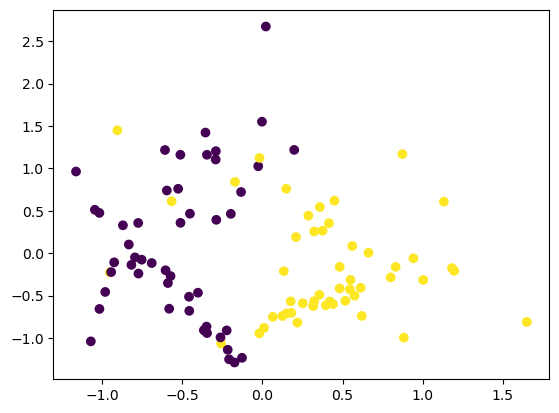

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7)
X_train=pd.DataFrame(X_train)
y_train=pd.Series(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.Series(y_test)

In [17]:
for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X_train, y_train)
    print(tree.tree)
    y_hat = tree.predict(X_test)
    # tree.plot()
    print("Criteria :", criteria)
    # print("RMSE: ", rmse(y_hat, y_test))
    # print("MAE: ", mae(y_hat, y_test))
    print("Accuracy: ", accuracy(y_hat, y_test))
    for cls in y_test.unique():
        print(f"Class: {cls}")
        print("Precision: ", precision(y_hat, y_test, cls))
        print("Recall: ", recall(y_hat, y_test, cls))

0
0.029245019226146973
0.2142238001598619
1
0.029245019226146973
0.14633295188379564
0
0.22053896008192087
0.031780030093204875
1
0.22053896008192087
1.1329099394610327
0
0.056907803414772445
-0.2588245906474876
1
0.056907803414772445
1.0341743322224446
0
0.13186688521061382
-0.8865256901404599
1
0.13186688521061382
-0.4095780312844628
0
0.31127740311365626
-0.9827833749650142
1
0.31127740311365626
0.18348226675077045
0
0.3166888478652161
-0.22665714591763442
1
0.3166888478652161
-1.2620130290599678
0
0.1709500173789245
-0.14862796773225034
1
0.1709500173789245
0.6524343120784581
0
0.31668812652207773
0.18971305866187974
1
0.31668812652207773
-0.011228813564084839
0
0.9999985573071228
0.2043565741471512
1
0.9999985573071228
0.7042777070485569
{0: {'Less than 0.2142238001598619': {0: {'Less than 0.031780030093204875': {0: {'Less than -0.2588245906474876': {0: {'Less than -0.8865256901404599': {0: {'Less than -0.9827833749650142': 0, 'Greater than -0.9827833749650142': 1}}, 'Greater than

In [18]:
def k_fold(X,y,criteria,depth,k=5)->int:
    # Initialize lists to store predictions and accuracies

    predictions = {}
    accuracies = []

    # Calculate the size of each fold
    fold_size = len(X) // k

    # Perform k-fold cross-validation
    for i in range(k):
        # Split the data into training and test sets
        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        test_set = X[test_start:test_end]
        test_labels = y[test_start:test_end]
        
        training_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
        training_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)
        training_set=pd.DataFrame(training_set)
        training_labels=pd.Series(training_labels)
        # Train the model
        dt_classifier =DecisionTree(criterion=criteria,max_depth=depth)
        dt_classifier.fit(training_set, training_labels)
        test_set=pd.DataFrame(test_set)
        # Make predictions on the validation set
        fold_predictions = dt_classifier.predict(test_set)
        test_labels=pd.Series(test_labels)
        # Calculate the accuracy of the fold
        fold_accuracy =accuracy(fold_predictions,test_labels)
        # Store the predictions and accuracy of the fold
        predictions[i] = fold_predictions
        accuracies.append(fold_accuracy)

    # Print the predictions and accuracies of each fold
    # for i in range(k):
    #     print("Fold {}: Accuracy: {:.4f}".format(i+1, accuracies[i]))
    return np.mean(accuracies)

In [19]:
opt_depth=0
opt_acc=0
for i in range (1,5):
    temp=k_fold(X,y,"information_gain",i)
    if(temp>opt_acc):
        opt_acc=temp
        opt_depth=i
opt_depth
        

0
0.09982005548667616
-0.5567693630506074
1
0.09982005548667616
-0.7252783821225601
0
0.021110834396299905
-1.01575081524803
1
0.021110834396299905
-1.242959818259882
0
0.05598631687883904
-0.15154643493571085
1
0.05598631687883904
-0.21059716062121242
0
0.04678108977088369
-0.20182008521231176
1
0.04678108977088369
-0.22484794684042053
0
0.04678108977088369
-0.21893954038133906
1
0.04678108977088369
-0.2335452640026076
0
0.09982005548667616
-0.5567693630506074
1
0.09982005548667616
-0.7252783821225601
0
0.0679584306858977
-0.8865256901404599
1
0.0679584306858977
-0.09250665881217385
0
0.5475187780854489
-0.022171294862907254
1
0.5475187780854489
-0.5956213846752128
0
0.021110834396299905
-1.01575081524803
1
0.021110834396299905
-1.242959818259882
0
0.624876094213706
-0.07272264344274099
1
0.624876094213706
-0.255350121645795
0
0.05598631687883904
-0.15154643493571085
1
0.05598631687883904
-0.21059716062121242
0
0.10306794835739137
-0.1834181030807553
1
0.10306794835739137
1.3200734405

KeyboardInterrupt: 

In [20]:
hyperparameters = {}
hyperparameters['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
hyperparameters['criteria_values'] = ["information_gain", "gini_index"]

best_accuracy = 0
best_hyperparameters = {}

out = {}
count = 0
for max_depth in hyperparameters['max_depth']:
        for criteria in hyperparameters['criteria_values']:
            # Create and fit the decision tree classifier with the current hyperparameters
            val_accuracy=k_fold(X,y,criteria=criteria,depth=max_depth)
            out[count] = {'max_depth': max_depth, 'criterion': criteria, 'val_accuracy': val_accuracy}
            count += 1
hparam_df = pd.DataFrame(out).T
hparam_df

0
0.09982005548667616
-0.5567693630506074
1
0.09982005548667616
-0.7252783821225601
0
0.021110834396299905
-1.01575081524803
1
0.021110834396299905
-1.242959818259882
0
0.05598631687883904
-0.15154643493571085
1
0.05598631687883904
-0.21059716062121242
0
0.04678108977088369
-0.20182008521231176
1
0.04678108977088369
-0.22484794684042053
0
0.04678108977088369
-0.21893954038133906
1
0.04678108977088369
-0.2335452640026076
0
0.09982005548667616
-0.5567693630506074
1
0.09982005548667616
-0.7252783821225601
0
0.0679584306858977
-0.8865256901404599
1
0.0679584306858977
-0.09250665881217385
0
0.5475187780854489
-0.022171294862907254
1
0.5475187780854489
-0.5956213846752128
0
0.021110834396299905
-1.01575081524803
1
0.021110834396299905
-1.242959818259882
0
0.624876094213706
-0.07272264344274099
1
0.624876094213706
-0.255350121645795
0
0.05598631687883904
-0.15154643493571085
1
0.05598631687883904
-0.21059716062121242
0
0.10306794835739137
-0.1834181030807553
1
0.10306794835739137
1.3200734405

KeyboardInterrupt: 

In [25]:
# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])
df=pd.DataFrame(data)
n = 5

# Create a list of DataFrames [X, X, ..., X] (n times)
dfs = [df] * n

# Concatenate all DataFrames in the list
result = pd.concat(dfs, ignore_index=True)

y=result['car name']
result=result.drop(['car name'],axis=1)
y=pd.Series(y)
# # df.replace('?', np.nan, inplace=True)
# # df = df.apply(pd.to_numeric, errors='coerce')
# # df = df.astype('float64')
# # print(df[0])
# # print(y)

# result=result.replace('?', np.nan, inplace=True)
result = result.apply(pd.to_numeric, errors='coerce')
result =result.astype('float64')
result

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
1985,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
1986,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
1987,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
1988,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [26]:
# accuracy_our_model=k_fold(df,y,criteria="information_gain",depth=5)
tree = DecisionTree(criterion="gini_index",max_depth=2)  # Split based on Inf. Gain
tree.fit(result,y)

print(tree.tree)
y_hat = tree.predict(result)
# tree.plot()
# print("RMSE: ", rmse(y_hat, y_test))
# print("MAE: ", mae(y_hat, y_test))
# print("Accuracy: ", accuracy(y_hat, y))
# for cls in y.unique():
#     print(f"Class: {cls}")
#     print("Precision: ", precision(y_hat, y, cls))
#     print("Recall: ", recall(y_hat, y, cls))

{'mpg': {'Less than 13.0': {'mpg': {'Less than 10.5': 'hi 1200d', 'Greater than 10.5': 'chevrolet impala'}}, 'Greater than 13.0': {'mpg': {'Less than 16.1': 'amc matador', 'Greater than 16.1': 'ford pinto'}}}}


In [27]:
print("Accuracy: ", accuracy(y_hat, y))

Accuracy:  0.03015075376884422


In [329]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])
df2=pd.DataFrame(data)
df2.replace('?', np.nan, inplace=True)
df2=df2.dropna()
y2=df2['car name']
df2=df2.drop(['car name'],axis=1)
y2=pd.Series(y)

df2 = df2.apply(pd.to_numeric, errors='coerce')
df2 = df2.astype('float64')
# print(df[0])
# print(y)


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(df2, y2)
y_hat2 = clf.predict(df2)
print(clf.get_depth())

19


In [252]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y2, y_hat2))
print("Classification Report:\n", classification_report(y2, y_hat2))
print("Confusion Matrix:\n", confusion_matrix(y2, y_hat2))

Accuracy: 0.8567839195979899
Classification Report:
                                       precision    recall  f1-score   support

             amc ambassador brougham       1.00      1.00      1.00         1
                  amc ambassador dpl       1.00      1.00      1.00         1
                  amc ambassador sst       0.50      1.00      0.67         1
                         amc concord       1.00      1.00      1.00         2
                     amc concord d/l       1.00      1.00      1.00         1
                      amc concord dl       1.00      1.00      1.00         1
                    amc concord dl 6       1.00      1.00      1.00         1
                         amc gremlin       1.00      1.00      1.00         4
                          amc hornet       1.00      1.00      1.00         4
          amc hornet sportabout (sw)       1.00      1.00      1.00         1
                         amc matador       0.62      1.00      0.77         5
          

c:\Users\anish\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anish\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anish\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
print(len(df),len(y.unique()))

398 305


In [330]:
# accuracy_our_model=k_fold(df,y,criteria="information_gain",depth=5)
tree = DecisionTree(criterion="information_gain",max_depth=3)  # Split based on Inf. Gain
tree.fit(df2,y2)

print(tree.tree)
y_hat = tree.predict(df2)
# tree.plot()
# print("RMSE: ", rmse(y_hat, y_test))
# print("MAE: ", mae(y_hat, y_test))
# print("Accuracy: ", accuracy(y_hat, y))
# for cls in y.unique():
#     print(f"Class: {cls}")
#     print("Precision: ", precision(y_hat, y, cls))
#     print("Recall: ", recall(y_hat, y, cls))

mpg
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: Column1, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: Column1, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: Column1, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: Column1, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: Column1, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
3